# Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk # Natural Language Toolki
import re # Python Regular Expression
from wordcloud import WordCloud
# Data visualization technique used for representing text data in which the size of each word indicates its frequency or importance


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
#Used that to tokenizing our text
from tensorflow.keras.preprocessing.sequence import pad_sequences
#Work for long line text padding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score


In [3]:
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

# DataSets

In [4]:
fake = pd.read_csv("/content/LabeledFake-1K.csv")

In [5]:
fake.head()

articleID                    domain                        date  \
0          1         channeldhaka.news   2019-03-14T13:34:14+00:00   
1          2                 earki.com            সেম্বর ১৭, ২০১৮    
2          3                 earki.com  ২০:৩৯, জানুয়ারি ১৪, ২০১৯    
3          4         channeldhaka.news   2018-06-30T15:56:47+00:00   
4          5  motikontho.wordpress.com   2013-03-05T21:55:45+00:00   

        category    source   relation  \
0  International  Reporter  Unrelated   
1  Miscellaneous  Reporter  Unrelated   
2  Miscellaneous  Reporter  Unrelated   
3         Sports  Reporter  Unrelated   
4  Miscellaneous  Reporter  Unrelated   

                                            headline  \
0                           মুরগির হামলায় শেয়াল নিহত   
1            বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম   
2  বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...   
3                      অবসর নেয়ার ঘোষণা দিলেন মেসি !   
4  মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...   

                                             content  label  F-type  
0  বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...      0  Satire  
1  BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...      0  Satire  
2  অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...      0  Satire  
3  রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...      0  Satire  
4  নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...      0  Satire

In [7]:
fake['domain'].value_counts()

domain
channeldhaka.news           436
earki.com                   291
motikontho.wordpress.com    195
bengalbeats.com             192
bengaliviralnews.com         51
                           ... 
dailynayadiganta.com          1
bn.banglafact.com             1
snpsports24.com               1
dailysatkhira.com             1
bdhotnews.com                 1
Name: count, Length: 84, dtype: int64

In [8]:
fake['category'].value_counts()

category
Miscellaneous    654
Entertainment    106
Lifestyle        102
National          99
International     91
Politics          90
Sports            54
Crime             42
Education         30
Technology        29
Finance            2
Name: count, dtype: int64

**Bar Graph for a specific Column (FAKE NEWS)**



<Axes: xlabel='category', ylabel='count'>

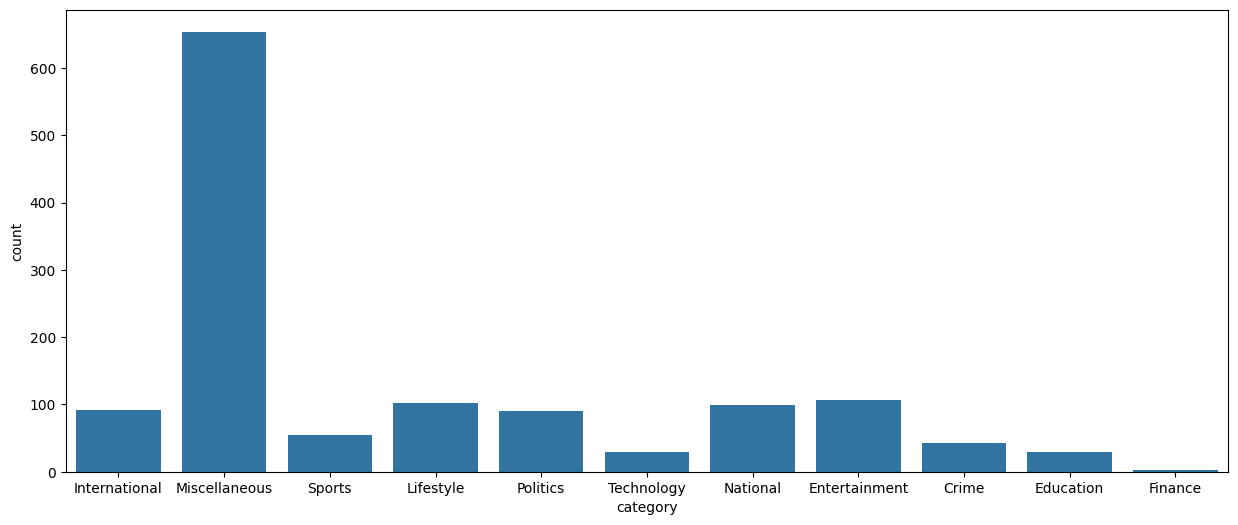

In [9]:
plt.figure(figsize=(15, 6))  # First Value fo X axis and Y value for Y axis
sns.countplot(x='category',data=fake)

**Text Data Visualization:**

## Word Clud

In [10]:
fake['content'] #Single series of text Data

0       বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...
1       BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...
2       অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...
3       রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...
4       নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...
                              ...                        
1294    রাজশাহীর সাহেব বাজার মোড়ে রাতে ঘুমের মধ্যে হাস...
1295    IAS পরীক্ষায় এমন এমন অবাক করে দেওয়া প্রশ্ন এসে...
1296    শাওমি মোবাইল ফোন বিস্ফোরণ হয়ে স্বপ্নীল মজুমদা...
1297    আপনাকে নতুন মন্ত্রিসভার সদস্যদের অভিনন্দন জানা...
1298    বিমান যখন আকাশে তখন আর কোনও দিকে খেয়াল না রেখ...
Name: content, Length: 1299, dtype: object

In [11]:
fake['content'].tolist() #Single series of text Data to a list

['বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্গা দেওয়া। প্রবাদটা এজন্য বলা হয় যে, শিয়ালের কাজই হলো মুরগী খেয়ে ফেলা। শেয়ালের কাছ থেকে মুরগী কখনো নিজেকে রক্ষা করতে পারেনা।তবে ফ্রান্সের এক বিশ্ববিদ্যালয়ের শিক্ষক-শিক্ষার্থীরা জানাচ্ছে, এবার এক আশ্চর্য্যজনক ঘটনা ঘটছে। মুরগীর হামলায় শিয়াল মারা গেছে।ঘটনাটি গত সপ্তাহের, ফ্রান্সের উত্তর-পূর্বাঞ্চলের বুতানিয়া এলাকার একটি কৃষিবিষয়ক বিদ্যালয়ে। ওই বিদ্যালয়ে একটি মুরগির খামার রয়েছে। মুরগির ঘরের এক কোনায় সকালে মৃত একটি শিয়াল পড়ে থাকতে দেখে শিক্ষার্থীরা।৬ হাজার মুরগি রয়েছে খামারটিতে। শিয়ালটির মৃতদেহ যেখানে পাওয়া গেছে, সেখানে তিন হাজার মুরগি ছিল। মুরগিগুলো সারা দিন বাইরে চরে বেড়ায়। সন্ধ্যা হলে নিজ থেকে ঘরে উঠে আসে। সূর্য ডুবে গেলেই দরজা বন্ধ হয়ে যায় স্বয়ংক্রিয়ভাবে।স্থানীয় বন্য প্রাণী বিশেষজ্ঞরা জানিয়েছেন, এই ঘটনায় তাঁরা অবাক। শিয়ালটি বাচ্চা ও অনভিজ্ঞ ছিল। এতগুলো মুরগির সামনে পড়ে সে সম্ভবত ভড়কে গিয়েছিল।Source- BBC Bangla',
 'BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টিম, এদের মধ্যে স্যুট, টাই পড়া বস একজন, দুইজন ক্যামেরাম্যান, আরেকজন উঠতি বয়সের, কড়া 

In [12]:
type(fake['content'].tolist()) #Check Datatype

list

In [13]:
#Convert List to Text data
text = ' '.join(fake['content'].tolist())

How Join will work:
Basicall using this join will caocat all text with a space: Before cell text system


In [14]:
!pip install python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 20.3 MB/s eta 0:00:00


In [15]:
from bidi.algorithm import get_display

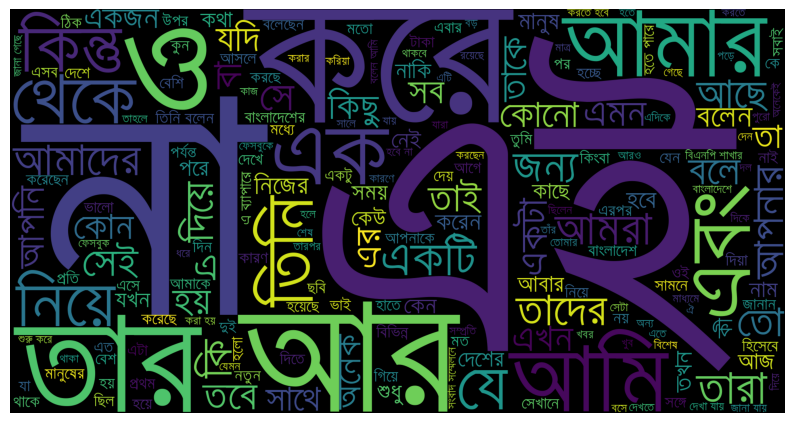

In [16]:
bidi_text = get_display(text)
rgx = r"[\u0980-\u09FF]+"
wordcloud = WordCloud(width=1920,height=1000,font_path='/content/Siyamrupali_1_070ship.ttf',regexp=rgx).generate(bidi_text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [17]:
text

'বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্গা দেওয়া। প্রবাদটা এজন্য বলা হয় যে, শিয়ালের কাজই হলো মুরগী খেয়ে ফেলা। শেয়ালের কাছ থেকে মুরগী কখনো নিজেকে রক্ষা করতে পারেনা।তবে ফ্রান্সের এক বিশ্ববিদ্যালয়ের শিক্ষক-শিক্ষার্থীরা জানাচ্ছে, এবার এক আশ্চর্য্যজনক ঘটনা ঘটছে। মুরগীর হামলায় শিয়াল মারা গেছে।ঘটনাটি গত সপ্তাহের, ফ্রান্সের উত্তর-পূর্বাঞ্চলের বুতানিয়া এলাকার একটি কৃষিবিষয়ক বিদ্যালয়ে। ওই বিদ্যালয়ে একটি মুরগির খামার রয়েছে। মুরগির ঘরের এক কোনায় সকালে মৃত একটি শিয়াল পড়ে থাকতে দেখে শিক্ষার্থীরা।৬ হাজার মুরগি রয়েছে খামারটিতে। শিয়ালটির মৃতদেহ যেখানে পাওয়া গেছে, সেখানে তিন হাজার মুরগি ছিল। মুরগিগুলো সারা দিন বাইরে চরে বেড়ায়। সন্ধ্যা হলে নিজ থেকে ঘরে উঠে আসে। সূর্য ডুবে গেলেই দরজা বন্ধ হয়ে যায় স্বয়ংক্রিয়ভাবে।স্থানীয় বন্য প্রাণী বিশেষজ্ঞরা জানিয়েছেন, এই ঘটনায় তাঁরা অবাক। শিয়ালটি বাচ্চা ও অনভিজ্ঞ ছিল। এতগুলো মুরগির সামনে পড়ে সে সম্ভবত ভড়কে গিয়েছিল।Source- BBC Bangla BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টিম, এদের মধ্যে স্যুট, টাই পড়া বস একজন, দুইজন ক্যামেরাম্যান, আরেকজন উঠতি বয়সের, কড়া মেকাপ

# Exploring With Real News

In [18]:
real = pd.read_csv("/content/LabeledAuthentic-7K.csv",encoding='UTF-8')

In [19]:
real.head()

articleID           domain                 date  category  \
0          1  bd-pratidin.com  2018-09-20 08:16:43    Sports   
1          2     jugantor.com  2018-09-20 20:20:20    Sports   
2          3     bd24live.com  2018-09-20 16:39:40  National   
3          4     bd24live.com  2018-09-19 18:27:56  National   
4          5     somoynews.tv  2018-09-20 10:15:28   Finance   

                               source relation  \
0  আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান  Related   
1                            Reporter  Related   
2                            Reporter  Related   
3            জননিরাপত্তা বিভাগের সচিব  Related   
4    পেট্রোল পাম্প মালিক সমিতি সভাপতি  Related   

                                            headline  \
0          হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ   
1                           টস হেরে বোলিংয়ে বাংলাদেশ   
2                     রাজধানীতে বিশেষ অভিযানে আটক ৪৩   
3  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...   
4     'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'   

                                             content  label  
0  ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...    1.0  
1  এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...    1.0  
2  রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...    1.0  
3  সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...    1.0  
4  ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...    1.0

In [20]:
real.columns

Index(['articleID', 'domain', 'date', 'category', 'source', 'relation',
       'headline', 'content', 'label'],
      dtype='object')

In [21]:
real['category'].value_counts()

category
National         3501
Sports            889
International     844
Politics          385
Editorial         336
Entertainment     302
Miscellaneous     290
Crime             224
Finance           136
Education         109
Technology         96
Lifestyle          90
Name: count, dtype: int64

**Bar Graph for a specific Column (REAL NEWS)**

<Axes: xlabel='category', ylabel='count'>

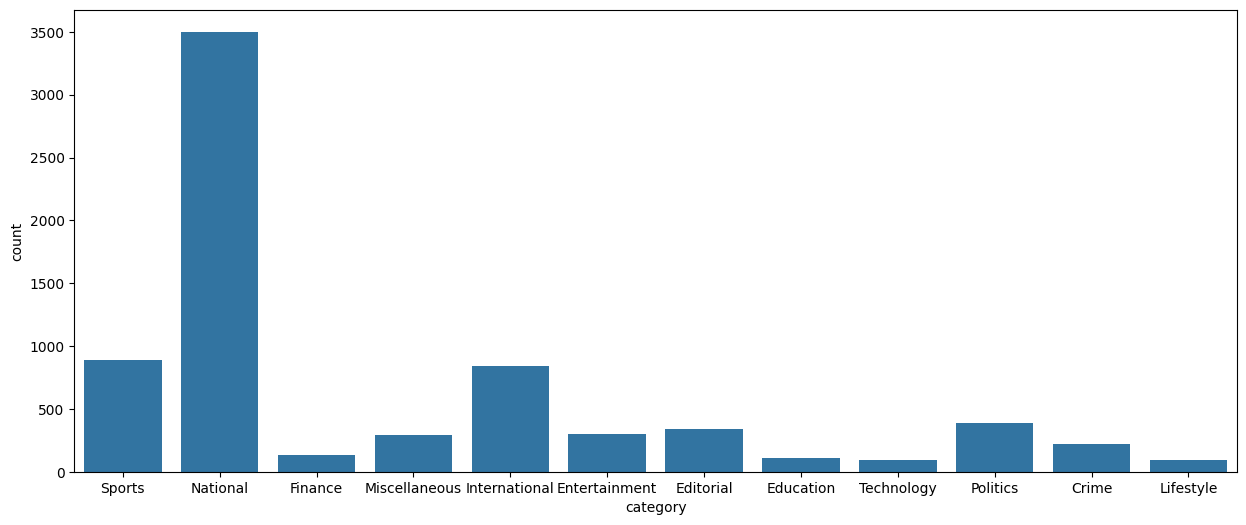

In [22]:
plt.figure(figsize=(15, 6))  # First Value fo X axis and Y value for Y axis
sns.countplot(x='category',data=real)

## Word Clude (REAL NEWS)

In [23]:
text = ' '.join(real['content'].tolist())

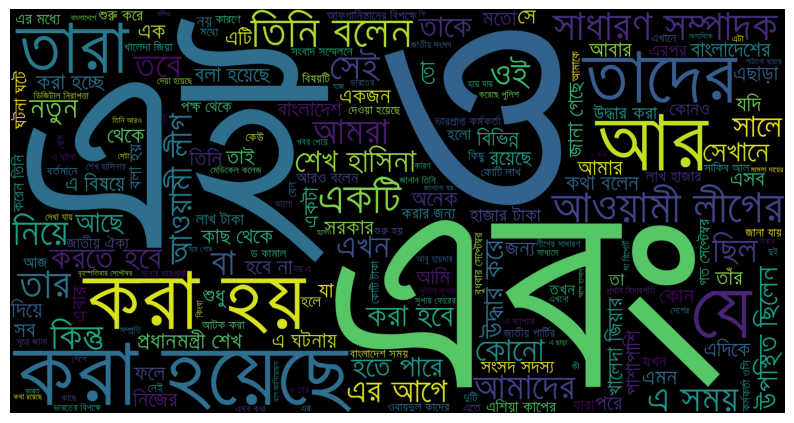

In [24]:
bidi_text = get_display(text)
rgx = r"[\u0980-\u09FF]+"
wordcloud = WordCloud(width=1920,height=1000,font_path='/content/Siyamrupali_1_070ship.ttf',regexp=rgx).generate(bidi_text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Cleaning Data
- Text can be splitted only once at "-" which is always present after mentioining sourve or publication.

In [25]:
real.sample(5)

articleID               domain                 date  category  \
4565       4962  dailyjanakantha.com  2018-09-19 21:24:55  National   
5918       6652     banglanews24.com  2018-09-20 13:24:28  Politics   
5780       6485          samakal.com  2018-09-20 11:25:11  Politics   
4705       5124           mzamin.com  2018-09-23 23:58:16  National   
621         631      kalerkantho.com  2018-09-20 14:49:59  National   

                                                 source relation  \
4565                                           reporter  Related   
5918  আওয়ামী লীগের সাধারণ সম্পাদক এবং সড়ক পরিবহন ও স...  Related   
5780                                           Reporter  Related   
4705          সড়ক ও সেতুমন্ত্রী এবং আওয়ামী লীগের সাধারণ  Related   
621        গোয়েন্দা পুলিশের অতিরিক্ত উপ-কমিশনার (বন্দর)  Related   

                                               headline  \
4565                 দিনাজপুরে ৫ জামায়াত-শিবির গ্রেফতার   
5918            ‘বিদেশিদের কাছে মায়াকান্না করছে বিএনপি’   
5780           ক্ষমতার সঙ্গে থাকার দৌড়ে ধর্মভিত্তিক দলও   
4705  মুন্সীগঞ্জে সড়ক সংস্কার কাজের উদ্বোধন করলেন ওব...   
621   স্বামী-সন্তান রেখে শিক্ষিকা চলে গেলেন কাঠমিস্ত...   

                                                content  label  
4565  স্টাফ রিপোর্টার, দিনাজপুর ॥ দিনাজপুর বিরামপুরে...    1.0  
5918  ঢাকা: আন্দোলনে জনগণের সাড়া না পেয়ে বিএনপি এখন ...    1.0  
5780  ﻿সংসদে প্রবেশের দৌড়ে নেমেছে ধর্মভিত্তিক দলগুলো...    1.0  
4705  ঢাকা-চট্টগ্রাম মহাসড়কের ভবেরচর বাসস্ট্যান্ড থে...    1.0  
621   নগরের হালিশহর থানা এলাকার বাসিন্দা সোনিয়া সিকদ...    1.0

In [26]:
real.iloc[4]

articleID                                                    5
domain                                            somoynews.tv
date                                       2018-09-20 10:15:28
category                                               Finance
source                        পেট্রোল পাম্প মালিক সমিতি সভাপতি
relation                                               Related
headline        'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'
content      ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...
label                                                      1.0
Name: 4, dtype: object

# **Publisher Checking For real news**

In [27]:
unknown_publish = []
for index,row in enumerate(real.content.values):
  try:
    record = row.split('-',maxsplit=1)
    record[1]

    assert(len(record[0])<120)
  except:
    unknown_publish.append(index)

In [28]:
len(unknown_publish)

6021

In [29]:
real.iloc[unknown_publish].content

0       ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...
1       এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...
2       রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...
3       সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...
5       ﻿আইনগত ভিত্তি পেলেই আগামী জাতীয় সংসদ নির্বাচনে...
                              ...                        
7196    শার্কের আক্রমণে ১২ বছরের একটি মেয়ে পায়ে আঘাত প...
7197    কুমিল্লার বুড়িচং উপজেলার এবদারপুর গ্রামে সাবেক...
7198    নানা মাঙ্গলিক আয়োজনের মধ্যে দিয়ে বান্দরবানে পা...
7199    নারায়ণগঞ্জের সিদ্ধিরগঞ্জে শীর্ষ মাদক ব্যবসায়ী ...
7200    ২০ বছরের পুরনো নীতিমালা দিয়েই চলছে দেশের টেলিয...
Name: content, Length: 6021, dtype: object

In [30]:
publisher = []
tmp_content = []

for index,row in enumerate(real.content.values):
  if index in unknown_publish:
    tmp_content.append(row)
    publisher.append('Unknown')

  else:
    record = row.split('-',maxsplit=1)
    publisher.append(record[0].strip())
    tmp_content.append(record[1].strip())

In [31]:
real['publisher']= publisher
real['content'] = tmp_content

In [32]:
real.shape

(7202, 10)

In [33]:
real.head()

articleID           domain                 date  category  \
0          1  bd-pratidin.com  2018-09-20 08:16:43    Sports   
1          2     jugantor.com  2018-09-20 20:20:20    Sports   
2          3     bd24live.com  2018-09-20 16:39:40  National   
3          4     bd24live.com  2018-09-19 18:27:56  National   
4          5     somoynews.tv  2018-09-20 10:15:28   Finance   

                               source relation  \
0  আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান  Related   
1                            Reporter  Related   
2                            Reporter  Related   
3            জননিরাপত্তা বিভাগের সচিব  Related   
4    পেট্রোল পাম্প মালিক সমিতি সভাপতি  Related   

                                            headline  \
0          হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ   
1                           টস হেরে বোলিংয়ে বাংলাদেশ   
2                     রাজধানীতে বিশেষ অভিযানে আটক ৪৩   
3  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...   
4     'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'   

                                             content  label  \
0  ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...    1.0   
1  এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...    1.0   
2  রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...    1.0   
3  সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...    1.0   
4  বাণিজ্যের পাশাপাশি সমৃদ্ধ হবে এ অঞ্চলের কৃষি ভ...    1.0   

                                           publisher  
0                                            Unknown  
1                                            Unknown  
2                                            Unknown  
3                                            Unknown  
4  ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...

In [34]:
real.iloc[4]

articleID                                                    5
domain                                            somoynews.tv
date                                       2018-09-20 10:15:28
category                                               Finance
source                        পেট্রোল পাম্প মালিক সমিতি সভাপতি
relation                                               Related
headline        'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'
content      বাণিজ্যের পাশাপাশি সমৃদ্ধ হবে এ অঞ্চলের কৃষি ভ...
label                                                      1.0
publisher    ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...
Name: 4, dtype: object

In [35]:
real = real.drop(4, axis=0)

In [36]:
real.head()

articleID           domain                 date  category  \
0          1  bd-pratidin.com  2018-09-20 08:16:43    Sports   
1          2     jugantor.com  2018-09-20 20:20:20    Sports   
2          3     bd24live.com  2018-09-20 16:39:40  National   
3          4     bd24live.com  2018-09-19 18:27:56  National   
5          6      samakal.com  2018-09-22 18:01:42  National   

                               source relation  \
0  আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান  Related   
1                            Reporter  Related   
2                            Reporter  Related   
3            জননিরাপত্তা বিভাগের সচিব  Related   
5     প্রধান নির্বাচন কমিশনার (সিইসি)  Related   

                                            headline  \
0          হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ   
1                           টস হেরে বোলিংয়ে বাংলাদেশ   
2                     রাজধানীতে বিশেষ অভিযানে আটক ৪৩   
3  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...   
5            আইনগত ভিত্তি পেলেই ইভিএম ব্যবহার: সিইসি   

                                             content  label publisher  
0  ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...    1.0   Unknown  
1  এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...    1.0   Unknown  
2  রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...    1.0   Unknown  
3  সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...    1.0   Unknown  
5  ﻿আইনগত ভিত্তি পেলেই আগামী জাতীয় সংসদ নির্বাচনে...    1.0   Unknown

In [37]:
real.shape

(7201, 10)

In [38]:
real['publisher']

0                                                Unknown
1                                                Unknown
2                                                Unknown
3                                                Unknown
5                                                Unknown
                              ...                       
7197                                             Unknown
7198                                             Unknown
7199                                             Unknown
7200                                             Unknown
7201    মারুফ কামরুল মুখ ভরে বমি করছে চুটকি। আধ ভাঙা ভাত
Name: publisher, Length: 7201, dtype: object

In [39]:
real = real.drop(7201, axis=0)

In [40]:
real['publisher']

0       Unknown
1       Unknown
2       Unknown
3       Unknown
5       Unknown
         ...   
7196    Unknown
7197    Unknown
7198    Unknown
7199    Unknown
7200    Unknown
Name: publisher, Length: 7200, dtype: object

# **Publisher Setup using Fake news Data**

In [41]:
unknown_publish = []
for index,row in enumerate(fake.content.values):
  try:
    record = row.split('-',maxsplit=1)
    record[1]

    assert(len(record[0])<120)
  except:
    unknown_publish.append(index)

In [42]:
len(unknown_publish)

1137

In [43]:
real.iloc[unknown_publish].content

0       ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...
1       এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...
5       ﻿আইনগত ভিত্তি পেলেই আগামী জাতীয় সংসদ নির্বাচনে...
6       চ্যাম্পিয়ন্স লিগে চ্যাম্পিয়নের মতোই শুরু করেছে...
7       শিক্ষামন্ত্রী নুরুল ইসলাম নাহিদ বলেছেন, ইন্টার...
                              ...                        
1295    ইউরোপীয় ইউনিয়নের বাজারে বাংলাদেশের পাটজাত পণ্য...
1296    সর্বোচ্চ রেমিটেন্স আহরণের জন্য ‘বাংলাদেশ ব্যা...
1297    ঢাকা (সাভার): সাভারের আমিনবাজার এলাকায় অভিযান ...
1298    আগামী সপ্তাহে নিউ ইয়র্কে জাতিসংঘ সাধারণ পরিষদে...
1299    উন নবী খান সোহেলকে পাঁচ দিনের রিমান্ড মঞ্জুর ক...
Name: content, Length: 1137, dtype: object

In [44]:
publisher = []
tmp_content = []

for index,row in enumerate(fake.content.values):
  if index in unknown_publish:
    tmp_content.append(row)
    publisher.append('Unknown')

  else:
    record = row.split('-',maxsplit=1)
    publisher.append(record[0].strip())
    tmp_content.append(record[1].strip())

In [45]:
fake['publisher']= publisher
fake['content'] = tmp_content

In [47]:
fake.shape

(1299, 11)

In [46]:
fake['publisher']

0                                                 Unknown
1                                                 Unknown
2       অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...
3            রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪
4                                                 Unknown
                              ...                        
1294                                              Unknown
1295                                              Unknown
1296                                              Unknown
1297                                              Unknown
1298                                              Unknown
Name: publisher, Length: 1299, dtype: object

In [48]:
fake = fake.drop(2, axis=0)
fake = fake.drop(3, axis=0)

In [49]:
fake['publisher']

0       Unknown
1       Unknown
4       Unknown
5       Unknown
6       Unknown
         ...   
1294    Unknown
1295    Unknown
1296    Unknown
1297    Unknown
1298    Unknown
Name: publisher, Length: 1297, dtype: object

# Cleaning Data
- Text can be splitted only once at "-" which is always present after mentioining sourve or publication.

In [50]:
real.sample(5)

articleID           domain                 date       category  \
1163       1186         rtnn.net  2018-09-22 23:27:52  International   
4780       5209     jugantor.com  2018-09-22 19:17:23      Editorial   
5669       6337  kalerkantho.com  2018-09-20 13:37:59  International   
5494       6097   jagonews24.com  2018-09-19 11:41:00          Crime   
2342       2456  kalerkantho.com  2018-09-20 14:49:58  Entertainment   

                                         source relation  \
1163                                    রয়টার্স  Related   
4780                                   reporter  Related   
5669                           টাইমস অব ইন্ডিয়া  Related   
5494  সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি  Related   
2342                          হিন্দুস্তান টাইমস  Related   

                                               headline  \
1163  আঙ্কারায় মার্কিন ব্যবসায়িকদের সাথে এরদোগানের ...   
4780                         ২২ সেপ্টেম্বর: আজকের ধাঁধা   
5669  মোদিকে ইমরানের চিঠি : পুনরায় শান্তি আলোচনা শুর...   
5494  মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...   
2342                     'লাভযাত্রী'ও চলবে না.....এবার?   

                                                content  label publisher  
1163  আন্তর্জাতিক ডেস্ক আরটিএনএন আঙ্কারা: যুক্তরাষ্ট...    1.0   Unknown  
4780  ধাঁধাচর্চা আপনার মস্তিষ্কের বিকাশ ঘটায়। এতে মস...    1.0   Unknown  
5669  ভারতের সঙ্গে পুনরায় শান্তি আলোচনা শুরু করতে চে...    1.0   Unknown  
5494  সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...    1.0   Unknown  
2342  একদিন আগেই ছবির নাম বদলালেন সালমান খান। তাঁর হ...    1.0   Unknown

In [51]:
real.iloc[4]

articleID                                                    6
domain                                             samakal.com
date                                       2018-09-22 18:01:42
category                                              National
source                         প্রধান নির্বাচন কমিশনার (সিইসি)
relation                                               Related
headline               আইনগত ভিত্তি পেলেই ইভিএম ব্যবহার: সিইসি
content      ﻿আইনগত ভিত্তি পেলেই আগামী জাতীয় সংসদ নির্বাচনে...
label                                                      1.0
publisher                                              Unknown
Name: 5, dtype: object

# **Publisher Checking For real news**

In [52]:
unknown_publish = []
for index,row in enumerate(real.content.values):
  try:
    record = row.split('-',maxsplit=1)
    record[1]

    assert(len(record[0])<120)
  except:
    unknown_publish.append(index)

In [53]:
len(unknown_publish)

6922

In [54]:
real.iloc[unknown_publish].content

0       ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...
1       এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...
2       রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...
3       সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...
5       ﻿আইনগত ভিত্তি পেলেই আগামী জাতীয় সংসদ নির্বাচনে...
                              ...                        
7196    শার্কের আক্রমণে ১২ বছরের একটি মেয়ে পায়ে আঘাত প...
7197    কুমিল্লার বুড়িচং উপজেলার এবদারপুর গ্রামে সাবেক...
7198    নানা মাঙ্গলিক আয়োজনের মধ্যে দিয়ে বান্দরবানে পা...
7199    নারায়ণগঞ্জের সিদ্ধিরগঞ্জে শীর্ষ মাদক ব্যবসায়ী ...
7200    ২০ বছরের পুরনো নীতিমালা দিয়েই চলছে দেশের টেলিয...
Name: content, Length: 6922, dtype: object

In [55]:
publisher = []
tmp_content = []

for index,row in enumerate(real.content.values):
  if index in unknown_publish:
    tmp_content.append(row)
    publisher.append('Unknown')

  else:
    record = row.split('-',maxsplit=1)
    publisher.append(record[0].strip())
    tmp_content.append(record[1].strip())

In [56]:
real['publisher']= publisher
real['content'] = tmp_content

In [57]:
real.shape

(7200, 10)

In [58]:
real.head()

articleID           domain                 date  category  \
0          1  bd-pratidin.com  2018-09-20 08:16:43    Sports   
1          2     jugantor.com  2018-09-20 20:20:20    Sports   
2          3     bd24live.com  2018-09-20 16:39:40  National   
3          4     bd24live.com  2018-09-19 18:27:56  National   
5          6      samakal.com  2018-09-22 18:01:42  National   

                               source relation  \
0  আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান  Related   
1                            Reporter  Related   
2                            Reporter  Related   
3            জননিরাপত্তা বিভাগের সচিব  Related   
5     প্রধান নির্বাচন কমিশনার (সিইসি)  Related   

                                            headline  \
0          হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ   
1                           টস হেরে বোলিংয়ে বাংলাদেশ   
2                     রাজধানীতে বিশেষ অভিযানে আটক ৪৩   
3  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...   
5            আইনগত ভিত্তি পেলেই ইভিএম ব্যবহার: সিইসি   

                                             content  label publisher  
0  ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...    1.0   Unknown  
1  এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...    1.0   Unknown  
2  রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...    1.0   Unknown  
3  সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...    1.0   Unknown  
5  ﻿আইনগত ভিত্তি পেলেই আগামী জাতীয় সংসদ নির্বাচনে...    1.0   Unknown

In [59]:
real.iloc[4]

articleID                                                    6
domain                                             samakal.com
date                                       2018-09-22 18:01:42
category                                              National
source                         প্রধান নির্বাচন কমিশনার (সিইসি)
relation                                               Related
headline               আইনগত ভিত্তি পেলেই ইভিএম ব্যবহার: সিইসি
content      ﻿আইনগত ভিত্তি পেলেই আগামী জাতীয় সংসদ নির্বাচনে...
label                                                      1.0
publisher                                              Unknown
Name: 5, dtype: object

In [61]:
real.head()

articleID           domain                 date  category  \
0          1  bd-pratidin.com  2018-09-20 08:16:43    Sports   
1          2     jugantor.com  2018-09-20 20:20:20    Sports   
2          3     bd24live.com  2018-09-20 16:39:40  National   
3          4     bd24live.com  2018-09-19 18:27:56  National   
5          6      samakal.com  2018-09-22 18:01:42  National   

                               source relation  \
0  আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান  Related   
1                            Reporter  Related   
2                            Reporter  Related   
3            জননিরাপত্তা বিভাগের সচিব  Related   
5     প্রধান নির্বাচন কমিশনার (সিইসি)  Related   

                                            headline  \
0          হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ   
1                           টস হেরে বোলিংয়ে বাংলাদেশ   
2                     রাজধানীতে বিশেষ অভিযানে আটক ৪৩   
3  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...   
5            আইনগত ভিত্তি পেলেই ইভিএম ব্যবহার: সিইসি   

                                             content  label publisher  
0  ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...    1.0   Unknown  
1  এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...    1.0   Unknown  
2  রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...    1.0   Unknown  
3  সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...    1.0   Unknown  
5  ﻿আইনগত ভিত্তি পেলেই আগামী জাতীয় সংসদ নির্বাচনে...    1.0   Unknown

In [62]:
real.shape

(7200, 10)

In [63]:
real['publisher']

0       Unknown
1       Unknown
2       Unknown
3       Unknown
5       Unknown
         ...   
7196    Unknown
7197    Unknown
7198    Unknown
7199    Unknown
7200    Unknown
Name: publisher, Length: 7200, dtype: object

In [65]:
real['publisher']

0       Unknown
1       Unknown
2       Unknown
3       Unknown
5       Unknown
         ...   
7196    Unknown
7197    Unknown
7198    Unknown
7199    Unknown
7200    Unknown
Name: publisher, Length: 7200, dtype: object

# **Publisher Setup using Fake news Data**

In [66]:
unknown_publish = []
for index,row in enumerate(fake.content.values):
  try:
    record = row.split('-',maxsplit=1)
    record[1]

    assert(len(record[0])<120)
  except:
    unknown_publish.append(index)

In [67]:
len(unknown_publish)

1247

In [68]:
real.iloc[unknown_publish].content

0       ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...
1       এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...
2       রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...
3       সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...
5       ﻿আইনগত ভিত্তি পেলেই আগামী জাতীয় সংসদ নির্বাচনে...
                              ...                        
1293    ইউরোপীয় ইউনিয়নের (ইইউ) ভোক্তা আইন মেনে না চললে...
1294    অসহনীয় তাপদাহে কেটেছে দু’টি দিন। মেঘহীন আকাশে ...
1295    ইউরোপীয় ইউনিয়নের বাজারে বাংলাদেশের পাটজাত পণ্য...
1296    সর্বোচ্চ রেমিটেন্স আহরণের জন্য ‘বাংলাদেশ ব্যা...
1297    ঢাকা (সাভার): সাভারের আমিনবাজার এলাকায় অভিযান ...
Name: content, Length: 1247, dtype: object

In [69]:
publisher = []
tmp_content = []

for index,row in enumerate(fake.content.values):
  if index in unknown_publish:
    tmp_content.append(row)
    publisher.append('Unknown')

  else:
    record = row.split('-',maxsplit=1)
    publisher.append(record[0].strip())
    tmp_content.append(record[1].strip())

In [70]:
fake['publisher']= publisher
fake['content'] = tmp_content

In [71]:
fake.shape

(1297, 11)

In [73]:
fake['publisher']

0       Unknown
1       Unknown
4       Unknown
5       Unknown
6       Unknown
         ...   
1294    Unknown
1295    Unknown
1296    Unknown
1297    Unknown
1298    Unknown
Name: publisher, Length: 1297, dtype: object

# **Preprocessin Data**

In [76]:
real.columns

Index(['articleID', 'domain', 'date', 'category', 'source', 'relation',
       'headline', 'content', 'label', 'publisher'],
      dtype='object')

In [77]:
fake.columns

Index(['articleID', 'domain', 'date', 'category', 'source', 'relation',
       'headline', 'content', 'label', 'F-type', 'publisher'],
      dtype='object')

**Set our Two Specific Column**

In [78]:
real = real[['content','label']]

In [79]:
fake = fake[['content','label']]

**Now Store Fake and Real News in single dataset**

In [82]:


data = pd.concat([real, fake], ignore_index=True)


In [83]:
data.sample(5)

content  label
7440  রাস্তায় চলাফেরা করবেন কিন্তু এই গল্পগুলো শুনবে...    0.0
603   চট্টগ্রাম মহাসড়ক সংলগ্ন বেলতলী অংশে পথচারী পার...    1.0
1564  সাতক্ষীরা সড়কের খাজুরা নামক স্থান থেকে মরদেহটি...    1.0
4556  ‘তথ্যে তারুণ্যে নিত্য সত্যে’ এই স্লোগানকে ধারণ...    1.0
4682  একটা ঘরের স্বপ্ন কে না দেখে? ছোট্ট একটা সংসারে...    1.0

# Now Work With Data

In [84]:
print("Total Reviews:",len(data),
      "\nTotal True News:",len(data[data.label==1.0]),
      "\nTotal Fake News:",len(data[data.label==0.0]),
)

Total Reviews: 8497 
Total True News: 7200 
Total Fake News: 1297


In [85]:
data.columns

Index(['content', 'label'], dtype='object')

In [86]:
# print some unprocessed reviews
sample_data = [10,100,150,200,250,600,650,666,689,640,650,700,750,800,1000,7757]
for i in sample_data:
      print(data.content[i],'\n','Sentiment:-- ',data.label[i],'\n')

সংরক্ষিত শূন্য পদ পূরণে শুধু মুক্তিযোদ্ধা কোটায় তিন পদে ২৮৬ জনকে নিয়োগ দেবে রাষ্ট্রায়ত্ত সোনালী ব্যাংক লিমিটেড। আবেদনের শেষ সময় আগামী ৭ অক্টোবর। প্রতিষ্ঠানটির ওয়েবসাইটে প্রকাশিত  বিজ্ঞপ্তি থেকে এই তথ্য জানা যায়। বিজ্ঞপ্তি অনুযায়ী,  ৬ মার্চ, ২০১৮ তারিখের আগ পর্যন্ত শূন্য পদ পূরণের জন্য এসব পদে শুধু মুক্তিযোদ্ধা/শহীদ মুক্তিযোদ্ধাদের ছেলে-মেয়ে ও তাদের সন্তানরা আবেদন করতে পারবেন। পদের নাম ও সংখ্যা: সিনিয়র অফিসার ৩৪টি শিক্ষাগত যোগ্যতা:  স্বীকৃত বিশ্ববিদ্যালয় থেকে যেকোনো বিষয়ে স্নাতকোত্তর ডিগ্রি অথবা চার বছর মেয়াদি স্নাতক (সম্মান) ডিগ্রি। মাধ্যমিক স্কুল সার্টিফিকেট/সমমান এবং তদূ্র্ধ্ব পর্যায়ের পরীক্ষাসমূহে ন্যূনতম দুটিতে প্রথম বিভাগ/শ্রেণি থাকতে হবে। কোনো পর্যায়েই তৃতীয় বিভাগ/শ্রেণি গ্রহণযোগ্য হবে না। বয়স: ১ জুলাই ২০১৮ তারিখে মুক্তিযোদ্ধা সন্তানদের ক্ষেত্রে সর্বোচ্চ বয়সসীমা ৩২ (বত্রিশ) বছর এবং অন্য ̈দের ক্ষেত্রে সর্বোচ্চ বয়সসীমা ৩০ (ত্রিশ) বছর। বয়সের এফিডেভিট গ্রহণযোগ্য নয়। বেতন: ২২ হাজার টাকা থেকে ৫৩ হাজার ৬০ টাকা এবং অন্যান্য সুবিধা। পদের নাম ও সংখ্যা: অফিসার  ৯২টি, অফিসার (ক্যাশ) ১৬০টি।

**Bar Graph for a specific Column (Label)**

<Axes: xlabel='label', ylabel='count'>

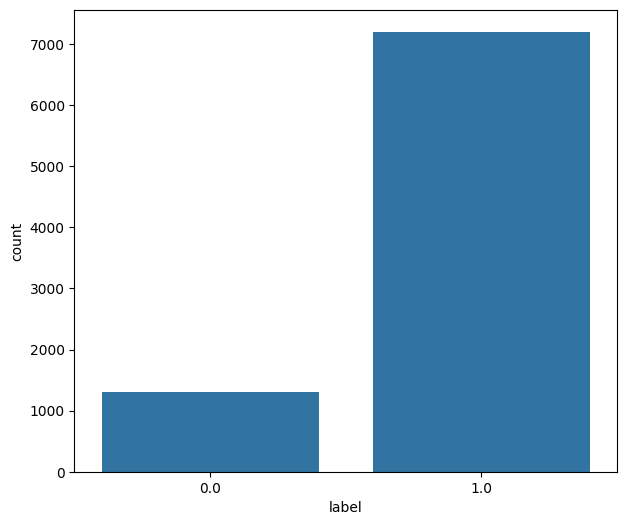

In [87]:
plt.figure(figsize=(7, 6))  # First Value fo X axis and Y value for Y axis
sns.countplot(x='label',data=data)
#0.0 == False
#1.0 == True

**Graph**

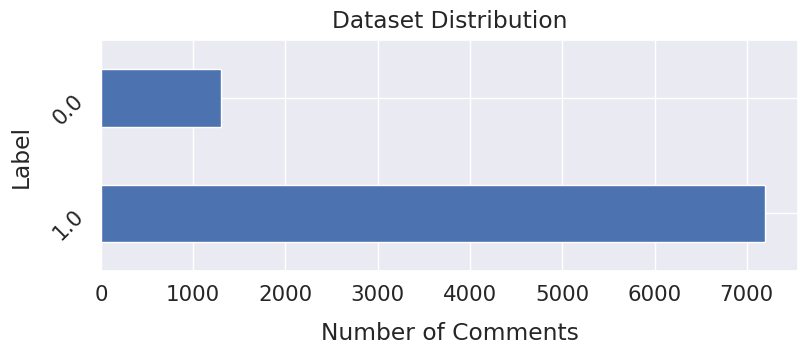

In [88]:
sns.set(font_scale=1.4)
data['label'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Label", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);
#0.0 == False
#1.0 == True

# Cleaning

In [89]:
# Data cleaning function
def process_content(content):
    content = re.sub('[^\u0980-\u09FF]',' ',str(content)) #removing unnecessary punctuation
    return content

In [90]:
# Apply the function into the dataframe
data['content'] = data['content'].apply(process_content)

# print some cleaned reviews from the dataset
sample_data = [10,100,25,854,966,1500,1589,1700,2000,2500,4000,4500]
for i in sample_data:
     print('Original:\n',data.content[i],'\nCleaned:\n',
           data.content[i],'\n','Label:-- ',data.label[i],'\n')

Original:
 সংরক্ষিত শূন্য পদ পূরণে শুধু মুক্তিযোদ্ধা কোটায় তিন পদে ২৮৬ জনকে নিয়োগ দেবে রাষ্ট্রায়ত্ত সোনালী ব্যাংক লিমিটেড  আবেদনের শেষ সময় আগামী ৭ অক্টোবর  প্রতিষ্ঠানটির ওয়েবসাইটে প্রকাশিত  বিজ্ঞপ্তি থেকে এই তথ্য জানা যায়  বিজ্ঞপ্তি অনুযায়ী   ৬ মার্চ  ২০১৮ তারিখের আগ পর্যন্ত শূন্য পদ পূরণের জন্য এসব পদে শুধু মুক্তিযোদ্ধা শহীদ মুক্তিযোদ্ধাদের ছেলে মেয়ে ও তাদের সন্তানরা আবেদন করতে পারবেন  পদের নাম ও সংখ্যা  সিনিয়র অফিসার ৩৪টি শিক্ষাগত যোগ্যতা   স্বীকৃত বিশ্ববিদ্যালয় থেকে যেকোনো বিষয়ে স্নাতকোত্তর ডিগ্রি অথবা চার বছর মেয়াদি স্নাতক  সম্মান  ডিগ্রি  মাধ্যমিক স্কুল সার্টিফিকেট সমমান এবং তদূ্র্ধ্ব পর্যায়ের পরীক্ষাসমূহে ন্যূনতম দুটিতে প্রথম বিভাগ শ্রেণি থাকতে হবে  কোনো পর্যায়েই তৃতীয় বিভাগ শ্রেণি গ্রহণযোগ্য হবে না  বয়স  ১ জুলাই ২০১৮ তারিখে মুক্তিযোদ্ধা সন্তানদের ক্ষেত্রে সর্বোচ্চ বয়সসীমা ৩২  বত্রিশ  বছর এবং অন্য  দের ক্ষেত্রে সর্বোচ্চ বয়সসীমা ৩০  ত্রিশ  বছর  বয়সের এফিডেভিট গ্রহণযোগ্য নয়  বেতন  ২২ হাজার টাকা থেকে ৫৩ হাজার ৬০ টাকা এবং অন্যান্য সুবিধা  পদের নাম ও সংখ্যা  অফিসার  ৯২টি  অফিসার  ক্

# DataSet Review

In [91]:
def data_summary(data):

    """
    This function will print the summary of the reviews and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(data.content) for word in t.strip().split()]
    class_label= [k for k,v in data.label.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(data[data.label==label].content) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(data[data.label==label].content)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(data[data.label==label].content))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(data)


Class Name :  1.0
Number of Documents:7200
Number of Words:1865469
Number of Unique Words:79435
Most Frequent Words:

ও	21723
করে	15887
এ	12627
থেকে	12034
না	11068
করা	10548
বলেন	9848
তিনি	9498
এই	9466
হয়	9383

Class Name :  0.0
Number of Documents:1297
Number of Words:369027
Number of Unique Words:41430
Most Frequent Words:

না	4274
করে	3766
এই	2969
বলেন	2049
থেকে	1996
তিনি	1882
ও	1837
তার	1758
এক	1752
আর	1729
Total Number of Unique Words:98078


# Review in Graph

/tmp/ipython-input-4219828266.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(class_names, rotation=45);


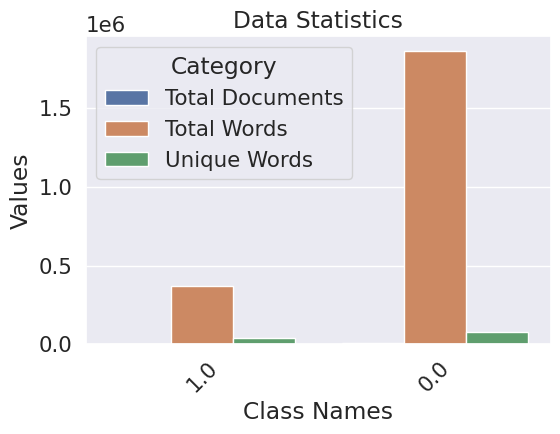

In [92]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

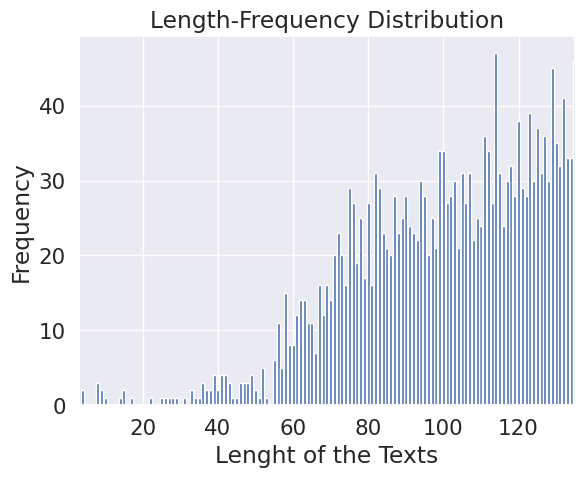

Maximum Length of a review: 3767
Minimum Length of a review: 0
Average Length of a reviews: 263.0


In [93]:
# Calculate the Review of each of the Review
data['ReviewLength'] = data.content.apply(lambda x:len(x.split()))
frequency = dict()
for i in data.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(3, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a review: {max(data.ReviewLength)}")
print(f"Minimum Length of a review: {min(data.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(data.ReviewLength),0)}")

Set True False

In [95]:


true  = data[data.label == 1.0]
false = data[data.label == 0.0]

data = pd.concat([true, false], ignore_index=True)

data.label.value_counts()


label
1.0    7200
0.0    1297
Name: count, dtype: int64

# Lable Encoding and Dataset Splitting

**Label Encoding Function**

In [96]:
def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format.

    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)

    Returns:
        labels: numpy array
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

**Dataset Splitting Function**

In [97]:
def dataset_split(feature_space,sentiment):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test

In [98]:

data.content = data.content.apply(lambda x:x.replace('\n',' '))

# Model Building Using Machine Learning Feature Extraction Using TF-IDF

In [99]:
def calc_gram_tfidf(reviews,gram):

    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split())
    X = tfidf.fit_transform(reviews)

    return tfidf,X

Algorithm

In [100]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

# Classifiers Defination

In [101]:
def ml_models_defination():

    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']

    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names


# Model Evaluation Function

In [102]:
def model_performace(model,X_train,X_test,y_train,y_test):

    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100

    return my_dict

# Model Performane into Dataframe

In [103]:
def performance_table(performance_dict):
    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

# Model Training

In [104]:
## save the performance of the model for each gram feature
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(data.content,gram)
    labels = label_encoding(data.label,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels)
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 98078

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 8497 
	Training		 7647 
	Test			 850


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 1032277

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 8497 
	Training		 7647 
	Test			 850


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 2555223

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 8497 
	Training		 7647 
	Test			 850


# Performance Table

In [105]:
# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  #accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     87.06      86.67  100.00     92.86          LR
1     90.59      94.41   94.41     94.41          DT
2     90.71      90.05  100.00     94.76          RF
3     92.59      92.01   99.86     95.77         MNB
4     84.47      84.42  100.00     91.55         KNN
5     84.59      84.52  100.00     91.61  Linear SVM
6     87.76      87.30  100.00     93.22     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by MNB at = 92.58999999999999
Highest F1-Score achieved by MNB at = 95.77
Highest Precision Score achieved by DT at = 94.41000000000001
Highest Recall Score achieved by LR at = 100.0

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     87.06      86.67  100.00     92.86          LR
1     90.59      94.41   94.41     94.41          DT
2     90.71      90.05  100.00     94.76     

# Performance Visualization

/tmp/ipython-input-2632093075.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);
/tmp/ipython-input-2632093075.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);
/tmp/ipython-input-2632093075.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);


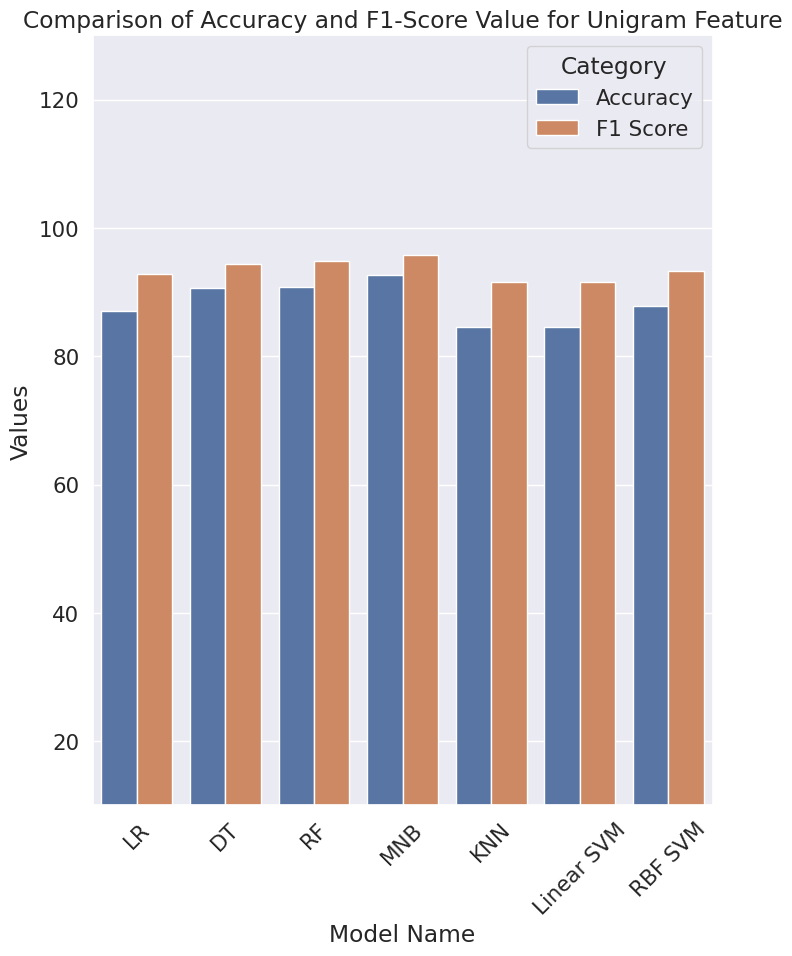

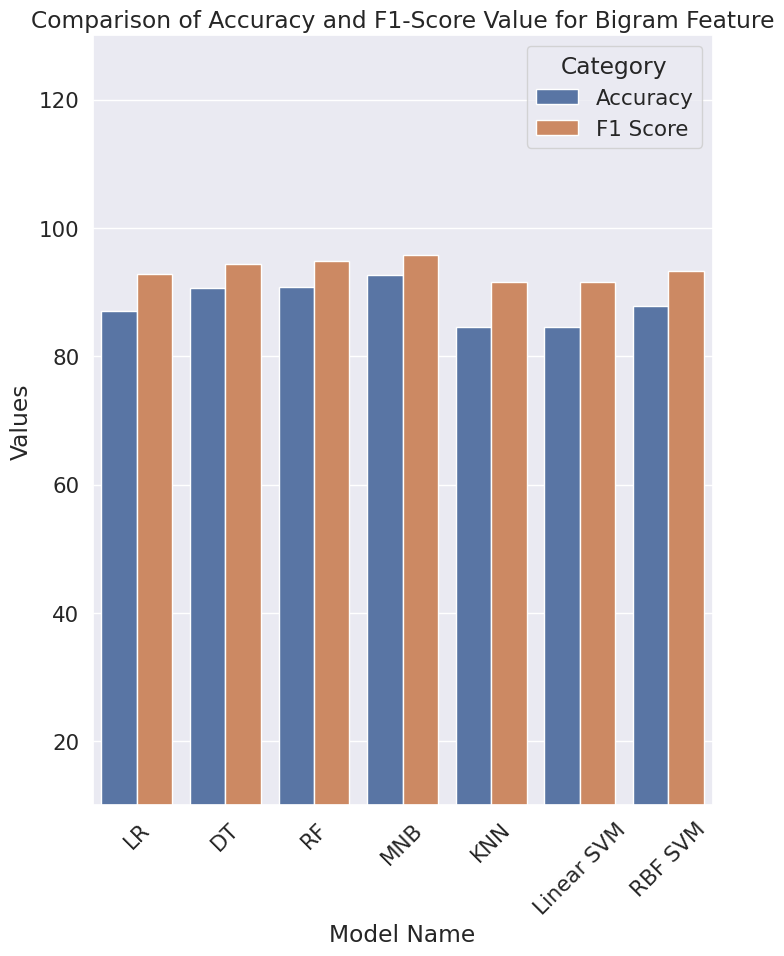

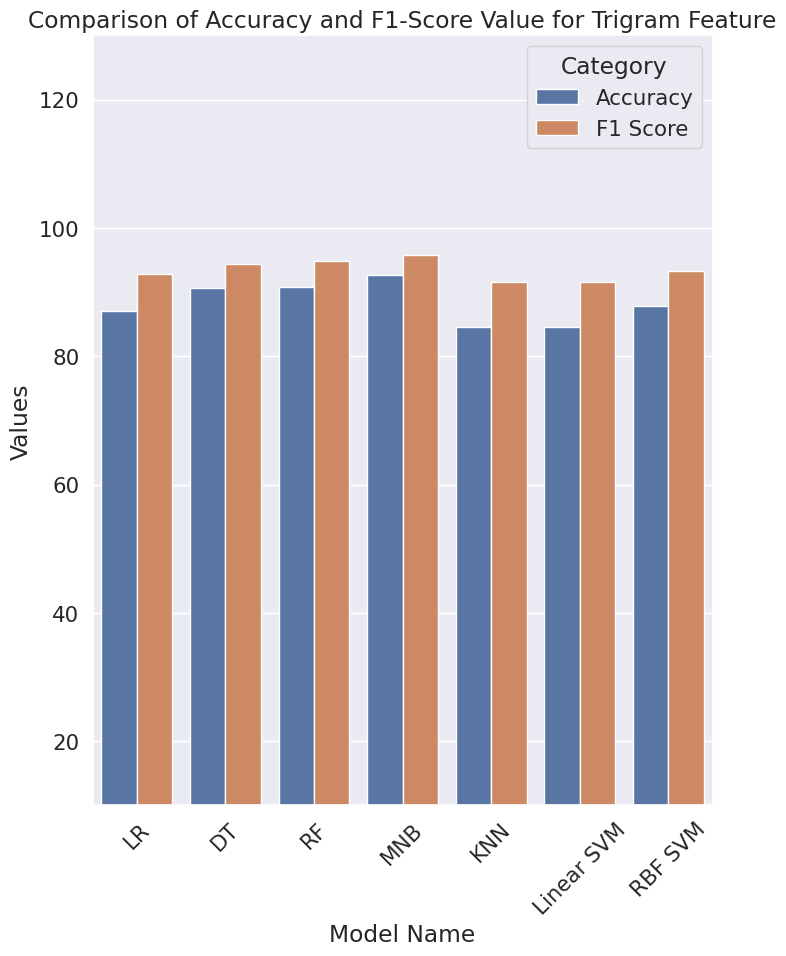

In [106]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  #accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,10))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name')
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,130]) # Accuracy Deprnd to 100% compare every model
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);